In [1]:
import os
import time
import numpy as np
import pandas as pd
import random
import torch
import operator
import torch.nn as nn
import matplotlib.pyplot as plt
#!pip install kornia

from google.colab import drive
drive.mount("/content/gdrive/")
%cd '/content/gdrive/Shareddrives/Disk1/InfoPro-Pytorch/Experiments on CIFAR-SVHN-STL10'

names = ["index", "time", "loss", "accuracy", "dump"]
def traindata(df):
  lis=[df.loc[df['index']==x,:] for x in df['index'] if operator.contains(x,'Val')]
  df_val=pd.DataFrame(np.array(lis).reshape(-1,5),columns=names)

  lis=[df.loc[df['index']==x,:] for x in df['index'] if operator.contains(x,'Epoch')]
  df=pd.DataFrame(np.array(lis).reshape(-1,5),columns=names)
  return df,df_val

Mounted at /content/gdrive/
/content/gdrive/Shareddrives/Disk1/InfoPro-Pytorch/Experiments on CIFAR-SVHN-STL10


#runs

##draw

In [ ]:
!pip install torchviz
from torchviz import make_dot

  Created wheel for torchviz: filename=torchviz-0.0.2-cp37-none-any.whl size=4152 sha256=fe1280d41e66f0ec034aedcd072f7c8d5c8447afc09355d4f7417d2b9f92d208
  Stored in directory: /root/.cache/pip/wheels/01/26/58/026ffd533dbe8b3972eb423da9c7949beca68d1c98ed9e8624
Successfully built torchviz


tensor([2., 2.], grad_fn=<MulBackward0>)
tensor([4., 4.], grad_fn=<MulBackward0>)
tensor(8., grad_fn=<SumBackward0>)


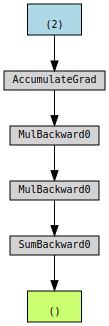

In [ ]:
x=torch.ones(2, requires_grad=True)
y=2*x
print(y)
y=2*y
print(y)
r=(y).sum()
print(r)    
make_dot(r)

tensor([2., 2.], grad_fn=<MulBackward0>)
tensor([4., 4.])
tensor(8.)


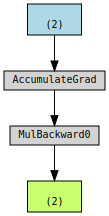

In [ ]:
x=torch.ones(2, requires_grad=True)
y=2*x
print(y)
with torch.no_grad():
  z=2*y
print(z)
r=(z).sum()
print(r)   
make_dot(y)
#make_dot(r)

tensor([2., 2.])
tensor([4., 4.])
tensor(8.)


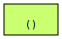

In [ ]:
x=torch.ones(2, requires_grad=True)
with torch.no_grad():
  y=2*x
print(y)
z=2*y
print(z)
r=(z).sum()
print(r)   
make_dot(r)

In [ ]:
chunk  0 0 nograd
1 0 0
chunk  1 0
1 1 0
chunk  1 0
2 0 0
************doing 2 0 0
chunk  1 0
2 1 1
chunk  1 0
3 0 1
chunk  1 0
3 1 1
chunk  1 0
3 2 1

##try run

In [ ]:
%%shell
CUDA_VISIBLE_DEVICES=0 python train_data_8.py --dataset fmnist --cos_lr --local_loss_mode cross_entropy\
 --workers 2 --epochs 25 --run 59 --lr 0.2 --rounds 8 --version 1 --num 10

#2w plots splitfed

###baseline v0

done


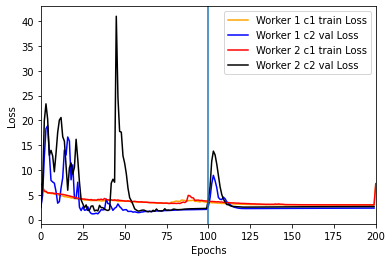

In [ ]:
path1='./InfoPro_fmnist_resnet16_K_2_SplitFed/worker_2/version_0/_epochs_[100, 100]_run11/training_process_Chunk0_w0.txt'
path2='./InfoPro_fmnist_resnet16_K_2_SplitFed/worker_2/version_0/_epochs_[100, 100]_run11/training_process_Chunk1_w0.txt'
df1 = pd.read_csv(path1, sep="\t", header=None, names=names)
df2 = pd.read_csv(path2, sep="\t", header=None, names=names)

df1_,df1_val=traindata(df1)
df2_,df2_val=traindata(df2)

l1 = []
l1_val = []
batchs=2
i=-1

for element1 in df1_.loss:
  i+=1
  if i%batchs==0:
    ele = element1.split("(")
    ele = ele[1].split(")")
    l1.append(float(ele[0]))
for element1 in df2_.loss:
  i+=1
  if i%batchs==0:
    ele = element1.split("(")
    ele = ele[1].split(")")
    l1.append(float(ele[0]))
    

for element1_val in df1_val.loss:
  ele1_val = element1_val.split("(")
  ele1_val = ele1_val[1].split(")")
  l1_val.append(float(ele1_val[0]))
for element1_val in df2_val.loss:
  ele1_val = element1_val.split("(")
  ele1_val = ele1_val[1].split(")")
  l1_val.append(float(ele1_val[0]))

plt.plot(l1, label = "Worker 1 c1 train Loss",c='orange')
plt.plot(l1_val, label = "Worker 1 c2 val Loss",c='blue')

#########################################################################
path1='./InfoPro_fmnist_resnet16_K_2_SplitFed/worker_2/version_0/_epochs_[100, 100]_run11/training_process_Chunk0_w1.txt'
path2='./InfoPro_fmnist_resnet16_K_2_SplitFed/worker_2/version_0/_epochs_[100, 100]_run11/training_process_Chunk1_w1.txt'
df1 = pd.read_csv(path1, sep="\t", header=None, names=names)
df2 = pd.read_csv(path2, sep="\t", header=None, names=names)

df1_,df1_val=traindata(df1)
df2_,df2_val=traindata(df2)

l1 = []
l1_val = []
batchs=2
i=-1

for element1 in df1_.loss:
  i+=1
  if i%batchs==0:
    ele = element1.split("(")
    ele = ele[1].split(")")
    l1.append(float(ele[0]))
for element1 in df2_.loss:
  i+=1
  if i%batchs==0:
    ele = element1.split("(")
    ele = ele[1].split(")")
    l1.append(float(ele[0]))
    

for element1_val in df1_val.loss:
  ele1_val = element1_val.split("(")
  ele1_val = ele1_val[1].split(")")
  l1_val.append(float(ele1_val[0]))
for element1_val in df2_val.loss:
  ele1_val = element1_val.split("(")
  ele1_val = ele1_val[1].split(")")
  l1_val.append(float(ele1_val[0]))

plt.plot(l1, label = "Worker 2 c1 train Loss",c='red')
plt.plot(l1_val, label = "Worker 2 c2 val Loss",c='black')

plt.axvline(100)
plt.xlim([0,200])
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
print("done")

Text(0, 0.5, 'acc')

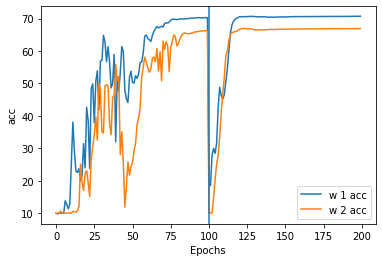

In [ ]:
path3='./InfoPro_fmnist_resnet16_K_2_SplitFed/worker_2/version_0/_epochs_[100, 100]_run11/accuracy_epoch_Chunk0_w0.txt'
path4='./InfoPro_fmnist_resnet16_K_2_SplitFed/worker_2/version_0/_epochs_[100, 100]_run11/accuracy_epoch_Chunk1_w0.txt'
df3 = pd.read_csv(path3, sep="\t", header=None, names = ["acc"])
df4 = pd.read_csv(path4, sep="\t", header=None, names = ["acc"])

l3 = []
for element3 in df3.acc: #c1
  l3.append(element3)
for element3 in df4.acc: #c2
  l3.append(element3)

plt.plot(l3, label = "w 1 acc")

#########################################################################

path3='./InfoPro_fmnist_resnet16_K_2_SplitFed/worker_2/version_0/_epochs_[100, 100]_run11/accuracy_epoch_Chunk0_w1.txt'
path4='./InfoPro_fmnist_resnet16_K_2_SplitFed/worker_2/version_0/_epochs_[100, 100]_run11/accuracy_epoch_Chunk1_w1.txt'
df3 = pd.read_csv(path3, sep="\t", header=None, names = ["acc"])
df4 = pd.read_csv(path4, sep="\t", header=None, names = ["acc"])

l3 = []
for element3 in df3.acc: #c1
  l3.append(element3)
for element3 in df4.acc: #c2
  l3.append(element3)

plt.plot(l3, label = "w 2 acc")

plt.axvline(100)
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("acc")

###baseline v1 

done


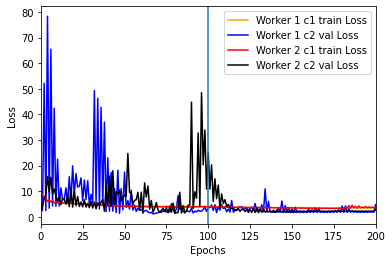

In [ ]:
path1='./InfoPro_fmnist_resnet16_K_2_SplitFed/worker_2/version_1/_epochs_[100, 100]_run11/training_process_Chunk0_w0.txt'
path2='./InfoPro_fmnist_resnet16_K_2_SplitFed/worker_2/version_1/_epochs_[100, 100]_run11/training_process_Chunk1_w0.txt'
df1 = pd.read_csv(path1, sep="\t", header=None, names=names)
df2 = pd.read_csv(path2, sep="\t", header=None, names=names)

df1_,df1_val=traindata(df1)
df2_,df2_val=traindata(df2)

l1 = []
l1_val = []
batchs=2
i=-1

for element1 in df1_.loss:
  i+=1
  if i%batchs==0:
    ele = element1.split("(")
    ele = ele[1].split(")")
    l1.append(float(ele[0]))
for element1 in df2_.loss:
  i+=1
  if i%batchs==0:
    ele = element1.split("(")
    ele = ele[1].split(")")
    l1.append(float(ele[0]))
    

for element1_val in df1_val.loss:
  ele1_val = element1_val.split("(")
  ele1_val = ele1_val[1].split(")")
  l1_val.append(float(ele1_val[0]))
for element1_val in df2_val.loss:
  ele1_val = element1_val.split("(")
  ele1_val = ele1_val[1].split(")")
  l1_val.append(float(ele1_val[0]))

plt.plot(l1, label = "Worker 1 c1 train Loss",c='orange')
plt.plot(l1_val, label = "Worker 1 c2 val Loss",c='blue')

#########################################################################
path1='./InfoPro_fmnist_resnet16_K_2_SplitFed/worker_2/version_1/_epochs_[100, 100]_run11/training_process_Chunk0_w1.txt'
path2='./InfoPro_fmnist_resnet16_K_2_SplitFed/worker_2/version_1/_epochs_[100, 100]_run11/training_process_Chunk1_w1.txt'
df1 = pd.read_csv(path1, sep="\t", header=None, names=names)
df2 = pd.read_csv(path2, sep="\t", header=None, names=names)

df1_,df1_val=traindata(df1)
df2_,df2_val=traindata(df2)

l1 = []
l1_val = []
batchs=2
i=-1

for element1 in df1_.loss:
  i+=1
  if i%batchs==0:
    ele = element1.split("(")
    ele = ele[1].split(")")
    l1.append(float(ele[0]))
for element1 in df2_.loss:
  i+=1
  if i%batchs==0:
    ele = element1.split("(")
    ele = ele[1].split(")")
    l1.append(float(ele[0]))
    

for element1_val in df1_val.loss:
  ele1_val = element1_val.split("(")
  ele1_val = ele1_val[1].split(")")
  l1_val.append(float(ele1_val[0]))
for element1_val in df2_val.loss:
  ele1_val = element1_val.split("(")
  ele1_val = ele1_val[1].split(")")
  l1_val.append(float(ele1_val[0]))

plt.plot(l1, label = "Worker 2 c1 train Loss",c='red')
plt.plot(l1_val, label = "Worker 2 c2 val Loss",c='black')

plt.axvline(100)
plt.xlim([0,200])
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
print("done")

Text(0, 0.5, 'acc')

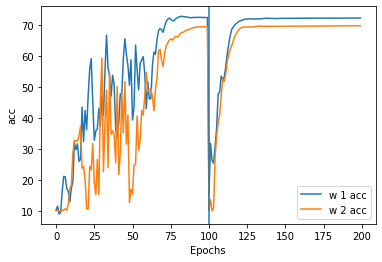

In [ ]:
path3='./InfoPro_fmnist_resnet16_K_2_SplitFed/worker_2/version_1/_epochs_[100, 100]_run11/accuracy_epoch_Chunk0_w0.txt'
path4='./InfoPro_fmnist_resnet16_K_2_SplitFed/worker_2/version_1/_epochs_[100, 100]_run11/accuracy_epoch_Chunk1_w0.txt'
df3 = pd.read_csv(path3, sep="\t", header=None, names = ["acc"])
df4 = pd.read_csv(path4, sep="\t", header=None, names = ["acc"])

l3 = []
for element3 in df3.acc: #c1
  l3.append(element3)
for element3 in df4.acc: #c2
  l3.append(element3)

plt.plot(l3, label = "w 1 acc")

#########################################################################

path3='./InfoPro_fmnist_resnet16_K_2_SplitFed/worker_2/version_1/_epochs_[100, 100]_run11/accuracy_epoch_Chunk0_w1.txt'
path4='./InfoPro_fmnist_resnet16_K_2_SplitFed/worker_2/version_1/_epochs_[100, 100]_run11/accuracy_epoch_Chunk1_w1.txt'
df3 = pd.read_csv(path3, sep="\t", header=None, names = ["acc"])
df4 = pd.read_csv(path4, sep="\t", header=None, names = ["acc"])

l3 = []
for element3 in df3.acc: #c1
  l3.append(element3)
for element3 in df4.acc: #c2
  l3.append(element3)

plt.plot(l3, label = "w 2 acc")

plt.axvline(100)
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("acc")

###sfl v0

done


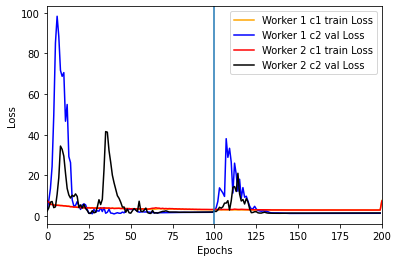

In [ ]:
path1='./InfoPro_fmnist_resnet16_K_2_SplitFed/worker_2/sfl_version_0/_epochs_[100, 100]_run11/training_process_Chunk0_w0.txt'
path2='./InfoPro_fmnist_resnet16_K_2_SplitFed/worker_2/sfl_version_0/_epochs_[100, 100]_run11/training_process_Chunk1_w0.txt'
df1 = pd.read_csv(path1, sep="\t", header=None, names=names)
df2 = pd.read_csv(path2, sep="\t", header=None, names=names)

df1_,df1_val=traindata(df1)
df2_,df2_val=traindata(df2)

l1 = []
l1_val = []
batchs=2
i=-1

for element1 in df1_.loss:
  i+=1
  if i%batchs==0:
    ele = element1.split("(")
    ele = ele[1].split(")")
    l1.append(float(ele[0]))
for element1 in df2_.loss:
  i+=1
  if i%batchs==0:
    ele = element1.split("(")
    ele = ele[1].split(")")
    l1.append(float(ele[0]))
    

for element1_val in df1_val.loss:
  ele1_val = element1_val.split("(")
  ele1_val = ele1_val[1].split(")")
  l1_val.append(float(ele1_val[0]))
for element1_val in df2_val.loss:
  ele1_val = element1_val.split("(")
  ele1_val = ele1_val[1].split(")")
  l1_val.append(float(ele1_val[0]))

plt.plot(l1, label = "Worker 1 c1 train Loss",c='orange')
plt.plot(l1_val, label = "Worker 1 c2 val Loss",c='blue')

#########################################################################
path1='./InfoPro_fmnist_resnet16_K_2_SplitFed/worker_2/sfl_version_0/_epochs_[100, 100]_run11/training_process_Chunk0_w1.txt'
path2='./InfoPro_fmnist_resnet16_K_2_SplitFed/worker_2/sfl_version_0/_epochs_[100, 100]_run11/training_process_Chunk1_w1.txt'
df1 = pd.read_csv(path1, sep="\t", header=None, names=names)
df2 = pd.read_csv(path2, sep="\t", header=None, names=names)

df1_,df1_val=traindata(df1)
df2_,df2_val=traindata(df2)

l1 = []
l1_val = []
batchs=2
i=-1

for element1 in df1_.loss:
  i+=1
  if i%batchs==0:
    ele = element1.split("(")
    ele = ele[1].split(")")
    l1.append(float(ele[0]))
for element1 in df2_.loss:
  i+=1
  if i%batchs==0:
    ele = element1.split("(")
    ele = ele[1].split(")")
    l1.append(float(ele[0]))
    

for element1_val in df1_val.loss:
  ele1_val = element1_val.split("(")
  ele1_val = ele1_val[1].split(")")
  l1_val.append(float(ele1_val[0]))
for element1_val in df2_val.loss:
  ele1_val = element1_val.split("(")
  ele1_val = ele1_val[1].split(")")
  l1_val.append(float(ele1_val[0]))

plt.plot(l1, label = "Worker 2 c1 train Loss",c='red')
plt.plot(l1_val, label = "Worker 2 c2 val Loss",c='black')

plt.axvline(100)
plt.xlim([0,200])
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
print("done")

Text(0, 0.5, 'acc')

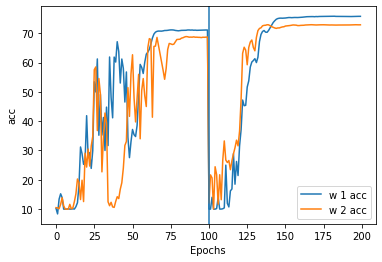

In [ ]:
path3='./InfoPro_fmnist_resnet16_K_2_SplitFed/worker_2/sfl_version_0/_epochs_[100, 100]_run11/accuracy_epoch_Chunk0_w0.txt'
path4='./InfoPro_fmnist_resnet16_K_2_SplitFed/worker_2/sfl_version_0/_epochs_[100, 100]_run11/accuracy_epoch_Chunk1_w0.txt'
df3 = pd.read_csv(path3, sep="\t", header=None, names = ["acc"])
df4 = pd.read_csv(path4, sep="\t", header=None, names = ["acc"])

l3 = []
for element3 in df3.acc: #c1
  l3.append(element3)
for element3 in df4.acc: #c2
  l3.append(element3)

plt.plot(l3, label = "w 1 acc")

#########################################################################

path3='./InfoPro_fmnist_resnet16_K_2_SplitFed/worker_2/sfl_version_0/_epochs_[100, 100]_run11/accuracy_epoch_Chunk0_w1.txt'
path4='./InfoPro_fmnist_resnet16_K_2_SplitFed/worker_2/sfl_version_0/_epochs_[100, 100]_run11/accuracy_epoch_Chunk1_w1.txt'
df3 = pd.read_csv(path3, sep="\t", header=None, names = ["acc"])
df4 = pd.read_csv(path4, sep="\t", header=None, names = ["acc"])

l3 = []
for element3 in df3.acc: #c1
  l3.append(element3)
for element3 in df4.acc: #c2
  l3.append(element3)

plt.plot(l3, label = "w 2 acc")

plt.axvline(100)
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("acc")

###sfl v1

done


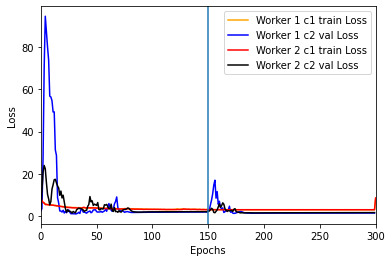

In [ ]:
path1='./InfoPro_fmnist_resnet16_K_2_SplitFed/worker_2/sfl_version_1/_epochs_[150, 150]_run2/training_process_Chunk0_w0.txt'
path2='./InfoPro_fmnist_resnet16_K_2_SplitFed/worker_2/sfl_version_1/_epochs_[150, 150]_run2/training_process_Chunk1_w0.txt'
df1 = pd.read_csv(path1, sep="\t", header=None, names=names)
df2 = pd.read_csv(path2, sep="\t", header=None, names=names)

df1_,df1_val=traindata(df1)
df2_,df2_val=traindata(df2)

l1 = []
l1_val = []
batchs=2
i=-1

for element1 in df1_.loss:
  i+=1
  if i%batchs==0:
    ele = element1.split("(")
    ele = ele[1].split(")")
    l1.append(float(ele[0]))
for element1 in df2_.loss:
  i+=1
  if i%batchs==0:
    ele = element1.split("(")
    ele = ele[1].split(")")
    l1.append(float(ele[0]))
    

for element1_val in df1_val.loss:
  ele1_val = element1_val.split("(")
  ele1_val = ele1_val[1].split(")")
  l1_val.append(float(ele1_val[0]))
for element1_val in df2_val.loss:
  ele1_val = element1_val.split("(")
  ele1_val = ele1_val[1].split(")")
  l1_val.append(float(ele1_val[0]))

plt.plot(l1, label = "Worker 1 c1 train Loss",c='orange')
plt.plot(l1_val, label = "Worker 1 c2 val Loss",c='blue')

#########################################################################
path1='./InfoPro_fmnist_resnet16_K_2_SplitFed/worker_2/sfl_version_1/_epochs_[150, 150]_run2/training_process_Chunk0_w1.txt'
path2='./InfoPro_fmnist_resnet16_K_2_SplitFed/worker_2/sfl_version_1/_epochs_[150, 150]_run2/training_process_Chunk1_w1.txt'
df1 = pd.read_csv(path1, sep="\t", header=None, names=names)
df2 = pd.read_csv(path2, sep="\t", header=None, names=names)

df1_,df1_val=traindata(df1)
df2_,df2_val=traindata(df2)

l1 = []
l1_val = []
batchs=2
i=-1

for element1 in df1_.loss:
  i+=1
  if i%batchs==0:
    ele = element1.split("(")
    ele = ele[1].split(")")
    l1.append(float(ele[0]))
for element1 in df2_.loss:
  i+=1
  if i%batchs==0:
    ele = element1.split("(")
    ele = ele[1].split(")")
    l1.append(float(ele[0]))
    

for element1_val in df1_val.loss:
  ele1_val = element1_val.split("(")
  ele1_val = ele1_val[1].split(")")
  l1_val.append(float(ele1_val[0]))
for element1_val in df2_val.loss:
  ele1_val = element1_val.split("(")
  ele1_val = ele1_val[1].split(")")
  l1_val.append(float(ele1_val[0]))

plt.plot(l1, label = "Worker 2 c1 train Loss",c='red')
plt.plot(l1_val, label = "Worker 2 c2 val Loss",c='black')

plt.axvline(150)
plt.xlim([0,300])
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
print("done")

Text(0, 0.5, 'acc')

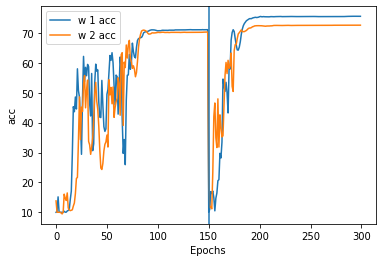

In [ ]:
path3='./InfoPro_fmnist_resnet16_K_2_SplitFed/worker_2/sfl_version_1/_epochs_[150, 150]_run2/accuracy_epoch_Chunk0_w0.txt'
path4='./InfoPro_fmnist_resnet16_K_2_SplitFed/worker_2/sfl_version_1/_epochs_[150, 150]_run2/accuracy_epoch_Chunk1_w0.txt'
df3 = pd.read_csv(path3, sep="\t", header=None, names = ["acc"])
df4 = pd.read_csv(path4, sep="\t", header=None, names = ["acc"])

l3 = []
for element3 in df3.acc: #c1
  l3.append(element3)
for element3 in df4.acc: #c2
  l3.append(element3)

plt.plot(l3, label = "w 1 acc")

#########################################################################

path3='./InfoPro_fmnist_resnet16_K_2_SplitFed/worker_2/sfl_version_1/_epochs_[150, 150]_run2/accuracy_epoch_Chunk0_w1.txt'
path4='./InfoPro_fmnist_resnet16_K_2_SplitFed/worker_2/sfl_version_1/_epochs_[150, 150]_run2/accuracy_epoch_Chunk1_w1.txt'
df3 = pd.read_csv(path3, sep="\t", header=None, names = ["acc"])
df4 = pd.read_csv(path4, sep="\t", header=None, names = ["acc"])

l3 = []
for element3 in df3.acc: #c1
  l3.append(element3)
for element3 in df4.acc: #c2
  l3.append(element3)

plt.plot(l3, label = "w 2 acc")

plt.axvline(150)
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("acc")

In [20]:
%%shell
CUDA_VISIBLE_DEVICES=0 python train_data_7.py --dataset fmnist --cos_lr --local_loss_mode cross_entropy\
 --workers 2 --epochs 100 --run 10 --lr 0.2 

Storing in ... ./InfoPro_fmnist_resnet16_K_2_SplitFed/worker_2/Bsfl_version_0/_epochs_[100, 100]_run10
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)
No of samples used (5000,) and unused (55000,)
No of samples used (10000,) and unused (0,)
worker 0
[25, 25, 25, 25, 25, 25, 25, 25, 25, 25]
worker 1
[25, 25, 25, 25, 25, 25, 25, 25, 25, 25]
---start_epoch [0, 0]
W1 C1 Epoch: [0][1/2]	Time 0.461 (0.461)	Loss 8.1315 (8.1315)	Prec@1 5.469 (5.469)	
W1

#2w plots

###baseline

In [ ]:
path1='./InfoPro_fmnist_resnet16_K_2_/s1(c1)s2(c2)/worker_1/alpha_5.0_beta_1_1.0_beta_2_1.0_gamma_1_0.0_gamma_2_0.0_epochs_[100, 100, 0, 0]_run1002_exp/training_process_Chunk0_0.txt'
path2='./InfoPro_fmnist_resnet16_K_2_/s1(c1)s2(c2)/worker_1/alpha_5.0_beta_1_1.0_beta_2_1.0_gamma_1_0.0_gamma_2_0.0_epochs_[100, 100, 0, 0]_run1002_exp/training_process_Chunk1_0.txt'
df1 = pd.read_csv(path1, sep="\t", header=None, names=names)
df2 = pd.read_csv(path2, sep="\t", header=None, names=names)

df1_,df1_val=traindata(df1)
df2_,df2_val=traindata(df2)

l1 = []
l1_val = []
batchs=2
i=-1

for element1 in df1_.loss:
  i+=1
  if i%batchs==0:
    ele = element1.split("(")
    ele = ele[1].split(")")
    l1.append(float(ele[0]))
for element1 in df2_.loss:
  i+=1
  if i%batchs==0:
    ele = element1.split("(")
    ele = ele[1].split(")")
    l1.append(float(ele[0]))
    

for element1_val in df1_val.loss:
  ele1_val = element1_val.split("(")
  ele1_val = ele1_val[1].split(")")
  l1_val.append(float(ele1_val[0]))
for element1_val in df2_val.loss:
  ele1_val = element1_val.split("(")
  ele1_val = ele1_val[1].split(")")
  l1_val.append(float(ele1_val[0]))

plt.plot(l1, label = "Worker 1 c1 train Loss",c='orange')
plt.plot(l1_val, label = "Worker 1 c2 val Loss",c='blue')

plt.axvline(100)
#plt.xlim([0,200])
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
print("done")

Text(0, 0.5, 'acc')

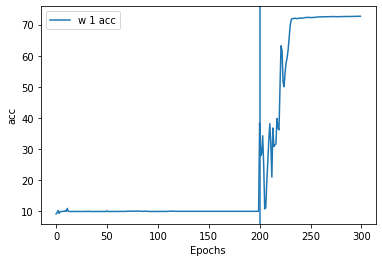

In [ ]:
path3='./InfoPro_fmnist_resnet16_K_2_/s1(c1)s2(c2)/worker_1/_num_10alpha_5.0_beta_1_1.0_beta_2_1.0_gamma_1_0.0_gamma_2_0.0_epochs_[200, 100, 0, 0]_run7002_exp/accuracy_epoch_Chunk0_0.txt'
path4='./InfoPro_fmnist_resnet16_K_2_/s1(c1)s2(c2)/worker_1/_num_10alpha_5.0_beta_1_1.0_beta_2_1.0_gamma_1_0.0_gamma_2_0.0_epochs_[200, 100, 0, 0]_run7002_exp/accuracy_epoch_Chunk1_0.txt'
df3 = pd.read_csv(path3, sep="\t", header=None, names = ["acc"])
df4 = pd.read_csv(path4, sep="\t", header=None, names = ["acc"])

l3 = []
for element3 in df3.acc: #c1
  l3.append(element3)
for element3 in df4.acc: #c2
  l3.append(element3)

plt.plot(l3, label = "w 1 acc")
plt.axvline(200)
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("acc")

###s1(c1)s2(c2)

In [ ]:
path1='./InfoPro_fmnist_resnet16_K_2_/s1(c1)s2(c2)/worker_2/_rampup_10alpha_5.0_beta_1_1.0_beta_2_1.0_gamma_1_10.0_gamma_2_10.0_epochs_[100, 100, 0, 0]_run1001_exp/training_process_Chunk0_0.txt'
path2='./InfoPro_fmnist_resnet16_K_2_/s1(c1)s2(c2)/worker_2/_rampup_10alpha_5.0_beta_1_1.0_beta_2_1.0_gamma_1_10.0_gamma_2_10.0_epochs_[100, 100, 0, 0]_run1001_exp/training_process_Chunk1_0.txt'
df1 = pd.read_csv(path1, sep="\t", header=None, names=names)
df2 = pd.read_csv(path2, sep="\t", header=None, names=names)

df1_,df1_val=traindata(df1)
df2_,df2_val=traindata(df2)

l1 = []
l1_val = []
batchs=2
i=-1

for element1 in df1_.loss:
  i+=1
  if i%batchs==0:
    ele = element1.split("(")
    ele = ele[1].split(")")
    l1.append(float(ele[0]))
for element1 in df2_.loss:
  i+=1
  if i%batchs==0:
    ele = element1.split("(")
    ele = ele[1].split(")")
    l1.append(float(ele[0]))
    

for element1_val in df1_val.loss:
  ele1_val = element1_val.split("(")
  ele1_val = ele1_val[1].split(")")
  l1_val.append(float(ele1_val[0]))
for element1_val in df2_val.loss:
  ele1_val = element1_val.split("(")
  ele1_val = ele1_val[1].split(")")
  l1_val.append(float(ele1_val[0]))

plt.plot(l1, label = "Worker 1 c1 train Loss",c='orange')
plt.plot(l1_val, label = "Worker 1 c2 val Loss",c='blue')

########################################################################
path1='./InfoPro_fmnist_resnet16_K_2_/s1(c1)s2(c2)/worker_2/_skewed_alpha_5.0_beta_1_1.0_beta_2_1.0_gamma_1_10.0_gamma_2_10.0_epochs_[100, 100, 0, 0]_run11_exp/training_process_Chunk0_1.txt'
path2='./InfoPro_fmnist_resnet16_K_2_/s1(c1)s2(c2)/worker_2/_skewed_alpha_5.0_beta_1_1.0_beta_2_1.0_gamma_1_10.0_gamma_2_10.0_epochs_[100, 100, 0, 0]_run11_exp/training_process_Chunk1_1.txt'
df1 = pd.read_csv(path1, sep="\t", header=None, names=names)
df2 = pd.read_csv(path2, sep="\t", header=None, names=names)

df1_,df1_val=traindata(df1)
df2_,df2_val=traindata(df2)

l1 = []
l1_val = []
batchs=2
i=-1

for element1 in df1_.loss:
  i+=1
  if i%batchs==0:
    ele = element1.split("(")
    ele = ele[1].split(")")
    l1.append(float(ele[0]))
for element1 in df2_.loss:
  i+=1
  if i%batchs==0:
    ele = element1.split("(")
    ele = ele[1].split(")")
    l1.append(float(ele[0]))
    

for element1_val in df1_val.loss:
  ele1_val = element1_val.split("(")
  ele1_val = ele1_val[1].split(")")
  l1_val.append(float(ele1_val[0]))
for element1_val in df2_val.loss:
  ele1_val = element1_val.split("(")
  ele1_val = ele1_val[1].split(")")
  l1_val.append(float(ele1_val[0]))

plt.plot(l1, label = "Worker 2 c1 train Loss",c='red')
plt.plot(l1_val, label = "Worker 2 c2 val Loss",c='black')

plt.axvline(100)
#plt.ylim([2.2,2.6])
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
print("done")

Text(0, 0.5, 'acc')

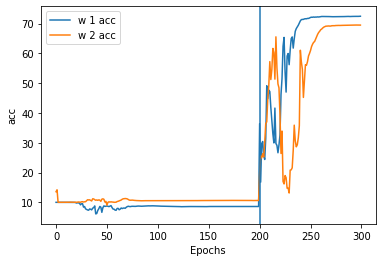

In [ ]:
path3='./InfoPro_fmnist_resnet16_K_2_/s1(c1)s2(c2)/worker_2/_num_10alpha_5.0_beta_1_1.0_beta_2_1.0_gamma_1_100.0_gamma_2_100.0_epochs_[200, 100, 0, 0]_run7001_exp/accuracy_epoch_Chunk0_0.txt'
path4='./InfoPro_fmnist_resnet16_K_2_/s1(c1)s2(c2)/worker_2/_num_10alpha_5.0_beta_1_1.0_beta_2_1.0_gamma_1_100.0_gamma_2_100.0_epochs_[200, 100, 0, 0]_run7001_exp/accuracy_epoch_Chunk1_0.txt'
df3 = pd.read_csv(path3, sep="\t", header=None, names = ["acc"])
df4 = pd.read_csv(path4, sep="\t", header=None, names = ["acc"])

l3 = []
for element3 in df3.acc: #c1
  l3.append(element3)
for element3 in df4.acc: #c2
  l3.append(element3)

plt.plot(l3, label = "w 1 acc")

#########################################################
path3='./InfoPro_fmnist_resnet16_K_2_/s1(c1)s2(c2)/worker_2/_num_10alpha_5.0_beta_1_1.0_beta_2_1.0_gamma_1_100.0_gamma_2_100.0_epochs_[200, 100, 0, 0]_run7001_exp/accuracy_epoch_Chunk0_1.txt'
path4='./InfoPro_fmnist_resnet16_K_2_/s1(c1)s2(c2)/worker_2/_num_10alpha_5.0_beta_1_1.0_beta_2_1.0_gamma_1_100.0_gamma_2_100.0_epochs_[200, 100, 0, 0]_run7001_exp/accuracy_epoch_Chunk1_1.txt'
df3 = pd.read_csv(path3, sep="\t", header=None, names = ["acc"])
df4 = pd.read_csv(path4, sep="\t", header=None, names = ["acc"])

l3 = []
for element3 in df3.acc:
  l3.append(element3)
for element3 in df4.acc:
  l3.append(element3)

plt.plot(l3, label = "w 2 acc")

plt.axvline(200)
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("acc")

###s1c1s2c2

Text(0, 0.5, 'acc')

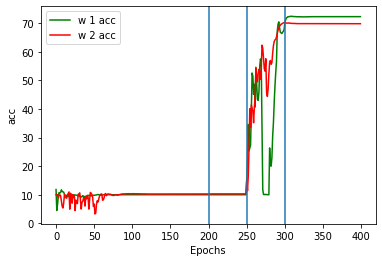

In [ ]:
path1='./InfoPro_fmnist_resnet16_K_2_/s1c1s2c2/worker_2/_num_10alpha_5.0_beta_1_1.0_beta_2_1.0_gamma_1_100.0_gamma_2_100.0_epochs_[200, 50, 50, 100]_run7001_exp/accuracy_epoch_Chunk0_0.txt'
path2='./InfoPro_fmnist_resnet16_K_2_/s1c1s2c2/worker_2/_num_10alpha_5.0_beta_1_1.0_beta_2_1.0_gamma_1_100.0_gamma_2_100.0_epochs_[200, 50, 50, 100]_run7001_exp/accuracy_epoch_Chunk1_0.txt'
path3='./InfoPro_fmnist_resnet16_K_2_/s1c1s2c2/worker_2/_num_10alpha_5.0_beta_1_1.0_beta_2_1.0_gamma_1_100.0_gamma_2_100.0_epochs_[200, 50, 50, 100]_run7001_exp/accuracy_epoch_Chunk2_0.txt'
path4='./InfoPro_fmnist_resnet16_K_2_/s1c1s2c2/worker_2/_num_10alpha_5.0_beta_1_1.0_beta_2_1.0_gamma_1_100.0_gamma_2_100.0_epochs_[200, 50, 50, 100]_run7001_exp/accuracy_epoch_Chunk3_0.txt'
df1 = pd.read_csv(path1, sep="\t", header=None, names = ["acc"])
df2 = pd.read_csv(path2, sep="\t", header=None, names = ["acc"])
df3 = pd.read_csv(path3, sep="\t", header=None, names = ["acc"])
df4 = pd.read_csv(path4, sep="\t", header=None, names = ["acc"])

l3 = []
for element3 in df1.acc: #c1
  l3.append(element3)
for element3 in df3.acc: #c2
  l3.append(element3)
for element3 in df2.acc: #c1
  l3.append(element3)
for element3 in df4.acc: #c2
  l3.append(element3)

plt.plot(l3, label = "w 1 acc",c='g')

#########################################################
path1='./InfoPro_fmnist_resnet16_K_2_/s1c1s2c2/worker_2/_num_10alpha_5.0_beta_1_1.0_beta_2_1.0_gamma_1_100.0_gamma_2_100.0_epochs_[200, 50, 50, 100]_run7001_exp/accuracy_epoch_Chunk0_1.txt'
path2='./InfoPro_fmnist_resnet16_K_2_/s1c1s2c2/worker_2/_num_10alpha_5.0_beta_1_1.0_beta_2_1.0_gamma_1_100.0_gamma_2_100.0_epochs_[200, 50, 50, 100]_run7001_exp/accuracy_epoch_Chunk1_1.txt'
path3='./InfoPro_fmnist_resnet16_K_2_/s1c1s2c2/worker_2/_num_10alpha_5.0_beta_1_1.0_beta_2_1.0_gamma_1_100.0_gamma_2_100.0_epochs_[200, 50, 50, 100]_run7001_exp/accuracy_epoch_Chunk2_1.txt'
path4='./InfoPro_fmnist_resnet16_K_2_/s1c1s2c2/worker_2/_num_10alpha_5.0_beta_1_1.0_beta_2_1.0_gamma_1_100.0_gamma_2_100.0_epochs_[200, 50, 50, 100]_run7001_exp/accuracy_epoch_Chunk3_1.txt'
df1 = pd.read_csv(path1, sep="\t", header=None, names = ["acc"])
df2 = pd.read_csv(path2, sep="\t", header=None, names = ["acc"])
df3 = pd.read_csv(path3, sep="\t", header=None, names = ["acc"])
df4 = pd.read_csv(path4, sep="\t", header=None, names = ["acc"])

l3 = []
for element3 in df1.acc:
  l3.append(element3)
for element3 in df3.acc:
  l3.append(element3)
for element3 in df2.acc:
  l3.append(element3)
for element3 in df4.acc:
  l3.append(element3)

plt.plot(l3, label = "w 2 acc",c='r')

plt.axvline(200)
plt.axvline(250)
plt.axvline(300)
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("acc")

###s1s2c1c2

Text(0, 0.5, 'acc')

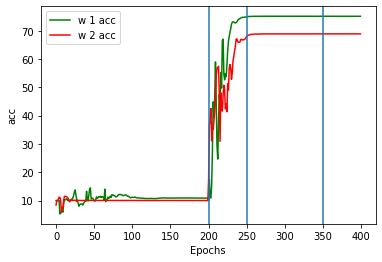

In [ ]:
path1='./InfoPro_fmnist_resnet16_K_2_/s1s2c1c2/worker_2/_num_10alpha_5.0_beta_1_1.0_beta_2_1.0_gamma_1_100.0_gamma_2_100.0_epochs_[200, 50, 100, 50]_run7001_exp/accuracy_epoch_Chunk0_0.txt'
path2='./InfoPro_fmnist_resnet16_K_2_/s1s2c1c2/worker_2/_num_10alpha_5.0_beta_1_1.0_beta_2_1.0_gamma_1_100.0_gamma_2_100.0_epochs_[200, 50, 100, 50]_run7001_exp/accuracy_epoch_Chunk1_0.txt'
path3='./InfoPro_fmnist_resnet16_K_2_/s1s2c1c2/worker_2/_num_10alpha_5.0_beta_1_1.0_beta_2_1.0_gamma_1_100.0_gamma_2_100.0_epochs_[200, 50, 100, 50]_run7001_exp/accuracy_epoch_Chunk2_0.txt'
path4='./InfoPro_fmnist_resnet16_K_2_/s1s2c1c2/worker_2/_num_10alpha_5.0_beta_1_1.0_beta_2_1.0_gamma_1_100.0_gamma_2_100.0_epochs_[200, 50, 100, 50]_run7001_exp/accuracy_epoch_Chunk3_0.txt'
df1 = pd.read_csv(path1, sep="\t", header=None, names = ["acc"])
df2 = pd.read_csv(path2, sep="\t", header=None, names = ["acc"])
df3 = pd.read_csv(path3, sep="\t", header=None, names = ["acc"])
df4 = pd.read_csv(path4, sep="\t", header=None, names = ["acc"])

l3 = []
for element3 in df1.acc: #c1
  l3.append(element3)
for element3 in df2.acc: #c2
  l3.append(element3)
for element3 in df3.acc: #c1
  l3.append(element3)
for element3 in df4.acc: #c2
  l3.append(element3)

plt.plot(l3, label = "w 1 acc",c='g')

#########################################################
path1='./InfoPro_fmnist_resnet16_K_2_/s1s2c1c2/worker_2/_num_10alpha_5.0_beta_1_1.0_beta_2_1.0_gamma_1_100.0_gamma_2_100.0_epochs_[200, 50, 100, 50]_run7001_exp/accuracy_epoch_Chunk0_1.txt'
path2='./InfoPro_fmnist_resnet16_K_2_/s1s2c1c2/worker_2/_num_10alpha_5.0_beta_1_1.0_beta_2_1.0_gamma_1_100.0_gamma_2_100.0_epochs_[200, 50, 100, 50]_run7001_exp/accuracy_epoch_Chunk1_1.txt'
path3='./InfoPro_fmnist_resnet16_K_2_/s1s2c1c2/worker_2/_num_10alpha_5.0_beta_1_1.0_beta_2_1.0_gamma_1_100.0_gamma_2_100.0_epochs_[200, 50, 100, 50]_run7001_exp/accuracy_epoch_Chunk2_1.txt'
path4='./InfoPro_fmnist_resnet16_K_2_/s1s2c1c2/worker_2/_num_10alpha_5.0_beta_1_1.0_beta_2_1.0_gamma_1_100.0_gamma_2_100.0_epochs_[200, 50, 100, 50]_run7001_exp/accuracy_epoch_Chunk3_1.txt'
df1 = pd.read_csv(path1, sep="\t", header=None, names = ["acc"])
df2 = pd.read_csv(path2, sep="\t", header=None, names = ["acc"])
df3 = pd.read_csv(path3, sep="\t", header=None, names = ["acc"])
df4 = pd.read_csv(path4, sep="\t", header=None, names = ["acc"])

l3 = []
for element3 in df1.acc:
  l3.append(element3)
for element3 in df2.acc:
  l3.append(element3)
for element3 in df3.acc:
  l3.append(element3)
for element3 in df4.acc:
  l3.append(element3)

plt.plot(l3, label = "w 2 acc",c='r')

plt.axvline(200)
plt.axvline(250)
plt.axvline(350)
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("acc")

###c1s1c2s2

In [ ]:
path1='./InfoPro_fmnist_resnet16_K_2_/c1s1c2s2/worker_2/alpha_5.0_beta_1_1.0_beta_2_1.0_gamma_1_100.0_gamma_2_100.0_epochs_[100, 100, 100, 100]_run20/accuracy_epoch_Chunk0_0.txt'
path2='./InfoPro_fmnist_resnet16_K_2_/c1s1c2s2/worker_2/alpha_5.0_beta_1_1.0_beta_2_1.0_gamma_1_100.0_gamma_2_100.0_epochs_[100, 100, 100, 100]_run20/accuracy_epoch_Chunk1_0.txt'
path3='./InfoPro_fmnist_resnet16_K_2_/c1s1c2s2/worker_2/alpha_5.0_beta_1_1.0_beta_2_1.0_gamma_1_100.0_gamma_2_100.0_epochs_[100, 100, 100, 100]_run20/accuracy_epoch_Chunk2_0.txt'
path4='./InfoPro_fmnist_resnet16_K_2_/c1s1c2s2/worker_2/alpha_5.0_beta_1_1.0_beta_2_1.0_gamma_1_100.0_gamma_2_100.0_epochs_[100, 100, 100, 100]_run20/accuracy_epoch_Chunk3_0.txt'
df1 = pd.read_csv(path1, sep="\t", header=None, names = ["acc"])
df2 = pd.read_csv(path2, sep="\t", header=None, names = ["acc"])
df3 = pd.read_csv(path3, sep="\t", header=None, names = ["acc"])
df4 = pd.read_csv(path4, sep="\t", header=None, names = ["acc"])

l3 = []
for element3 in df3.acc: #c1
  l3.append(element3)
for element3 in df1.acc: #c2
  l3.append(element3)
for element3 in df4.acc: #c1
  l3.append(element3)
for element3 in df2.acc: #c2
  l3.append(element3)

plt.plot(l3, label = "w 1 acc",c='g')

#########################################################
path1='./InfoPro_fmnist_resnet16_K_2_/c1s1c2s2/worker_2/alpha_5.0_beta_1_1.0_beta_2_1.0_gamma_1_100.0_gamma_2_100.0_epochs_[100, 100, 100, 100]_run20/accuracy_epoch_Chunk0_1.txt'
path2='./InfoPro_fmnist_resnet16_K_2_/c1s1c2s2/worker_2/alpha_5.0_beta_1_1.0_beta_2_1.0_gamma_1_100.0_gamma_2_100.0_epochs_[100, 100, 100, 100]_run20/accuracy_epoch_Chunk1_1.txt'
path3='./InfoPro_fmnist_resnet16_K_2_/c1s1c2s2/worker_2/alpha_5.0_beta_1_1.0_beta_2_1.0_gamma_1_100.0_gamma_2_100.0_epochs_[100, 100, 100, 100]_run20/accuracy_epoch_Chunk2_1.txt'
path4='./InfoPro_fmnist_resnet16_K_2_/c1s1c2s2/worker_2/alpha_5.0_beta_1_1.0_beta_2_1.0_gamma_1_100.0_gamma_2_100.0_epochs_[100, 100, 100, 100]_run20/accuracy_epoch_Chunk3_1.txt'
df1 = pd.read_csv(path1, sep="\t", header=None, names = ["acc"])
df2 = pd.read_csv(path2, sep="\t", header=None, names = ["acc"])
df3 = pd.read_csv(path3, sep="\t", header=None, names = ["acc"])
df4 = pd.read_csv(path4, sep="\t", header=None, names = ["acc"])

l3 = []
for element3 in df3.acc:
  l3.append(element3)
for element3 in df1.acc:
  l3.append(element3)
for element3 in df4.acc:
  l3.append(element3)
for element3 in df2.acc:
  l3.append(element3)

plt.plot(l3, label = "w 2 acc",c='r')

plt.axvline(100)
plt.axvline(200)
plt.axvline(300)
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("acc")

###c1c2s1s2 

Text(0, 0.5, 'acc')

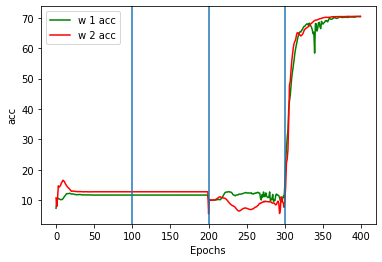

In [ ]:
path1='./InfoPro_fmnist_resnet16_K_2_/c1c2s1s2/worker_2/alpha_5.0_beta_1_1.0_beta_2_1.0_gamma_1_10.0_gamma_2_10.0_epochs_[100, 100, 100, 100]_run101/accuracy_epoch_Chunk0_0.txt'
path2='./InfoPro_fmnist_resnet16_K_2_/c1c2s1s2/worker_2/alpha_5.0_beta_1_1.0_beta_2_1.0_gamma_1_10.0_gamma_2_10.0_epochs_[100, 100, 100, 100]_run101/accuracy_epoch_Chunk1_0.txt'
path3='./InfoPro_fmnist_resnet16_K_2_/c1c2s1s2/worker_2/alpha_5.0_beta_1_1.0_beta_2_1.0_gamma_1_10.0_gamma_2_10.0_epochs_[100, 100, 100, 100]_run101/accuracy_epoch_Chunk2_0.txt'
path4='./InfoPro_fmnist_resnet16_K_2_/c1c2s1s2/worker_2/alpha_5.0_beta_1_1.0_beta_2_1.0_gamma_1_10.0_gamma_2_10.0_epochs_[100, 100, 100, 100]_run101/accuracy_epoch_Chunk3_0.txt'
df1 = pd.read_csv(path1, sep="\t", header=None, names = ["acc"])
df2 = pd.read_csv(path2, sep="\t", header=None, names = ["acc"])
df3 = pd.read_csv(path3, sep="\t", header=None, names = ["acc"])
df4 = pd.read_csv(path4, sep="\t", header=None, names = ["acc"])

l3 = []
for element3 in df3.acc: #c1
  l3.append(element3)
for element3 in df4.acc: #c2
  l3.append(element3)
for element3 in df1.acc: #c1
  l3.append(element3)
for element3 in df2.acc: #c2
  l3.append(element3)

plt.plot(l3, label = "w 1 acc",c='g')

#########################################################
path1='./InfoPro_fmnist_resnet16_K_2_/c1c2s1s2/worker_2/alpha_5.0_beta_1_1.0_beta_2_1.0_gamma_1_10.0_gamma_2_10.0_epochs_[100, 100, 100, 100]_run101/accuracy_epoch_Chunk0_1.txt'
path2='./InfoPro_fmnist_resnet16_K_2_/c1c2s1s2/worker_2/alpha_5.0_beta_1_1.0_beta_2_1.0_gamma_1_10.0_gamma_2_10.0_epochs_[100, 100, 100, 100]_run101/accuracy_epoch_Chunk1_1.txt'
path3='./InfoPro_fmnist_resnet16_K_2_/c1c2s1s2/worker_2/alpha_5.0_beta_1_1.0_beta_2_1.0_gamma_1_10.0_gamma_2_10.0_epochs_[100, 100, 100, 100]_run101/accuracy_epoch_Chunk2_1.txt'
path4='./InfoPro_fmnist_resnet16_K_2_/c1c2s1s2/worker_2/alpha_5.0_beta_1_1.0_beta_2_1.0_gamma_1_10.0_gamma_2_10.0_epochs_[100, 100, 100, 100]_run101/accuracy_epoch_Chunk3_1.txt'
df1 = pd.read_csv(path1, sep="\t", header=None, names = ["acc"])
df2 = pd.read_csv(path2, sep="\t", header=None, names = ["acc"])
df3 = pd.read_csv(path3, sep="\t", header=None, names = ["acc"])
df4 = pd.read_csv(path4, sep="\t", header=None, names = ["acc"])

l3 = []
for element3 in df3.acc:
  l3.append(element3)
for element3 in df4.acc:
  l3.append(element3)
for element3 in df1.acc:
  l3.append(element3)
for element3 in df2.acc:
  l3.append(element3)

plt.plot(l3, label = "w 2 acc",c='r')

plt.axvline(100)
plt.axvline(200)
plt.axvline(300)
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("acc")

#3w plots

###s1(c1)s2(c2)

Text(0, 0.5, 'acc')

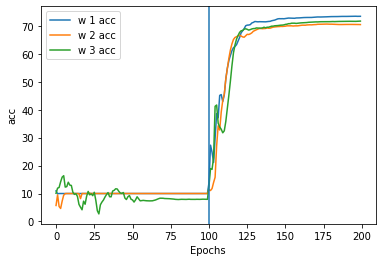

In [ ]:
path3='./InfoPro_fmnist_resnet16_K_2_/s1(c1)s2(c2)/worker_3/alpha_5.0_beta_1_1.0_beta_2_1.0_gamma_1_10.0_gamma_2_10.0_epochs_[100, 100, 0, 0]_run15/accuracy_epoch_Chunk0_0.txt'
path4='./InfoPro_fmnist_resnet16_K_2_/s1(c1)s2(c2)/worker_3/alpha_5.0_beta_1_1.0_beta_2_1.0_gamma_1_10.0_gamma_2_10.0_epochs_[100, 100, 0, 0]_run15/accuracy_epoch_Chunk1_0.txt'
df3 = pd.read_csv(path3, sep="\t", header=None, names = ["acc"])
df4 = pd.read_csv(path4, sep="\t", header=None, names = ["acc"])

l3 = []
for element3 in df3.acc: #c1
  l3.append(element3)
for element3 in df4.acc: #c2
  l3.append(element3)

plt.plot(l3, label = "w 1 acc")

#########################################################
path3='./InfoPro_fmnist_resnet16_K_2_/s1(c1)s2(c2)/worker_3/alpha_5.0_beta_1_1.0_beta_2_1.0_gamma_1_10.0_gamma_2_10.0_epochs_[100, 100, 0, 0]_run15/accuracy_epoch_Chunk0_1.txt'
path4='./InfoPro_fmnist_resnet16_K_2_/s1(c1)s2(c2)/worker_3/alpha_5.0_beta_1_1.0_beta_2_1.0_gamma_1_10.0_gamma_2_10.0_epochs_[100, 100, 0, 0]_run15/accuracy_epoch_Chunk1_1.txt'
df3 = pd.read_csv(path3, sep="\t", header=None, names = ["acc"])
df4 = pd.read_csv(path4, sep="\t", header=None, names = ["acc"])

l3 = []
for element3 in df3.acc:
  l3.append(element3)
for element3 in df4.acc:
  l3.append(element3)

plt.plot(l3, label = "w 2 acc")

#########################################################
path3='./InfoPro_fmnist_resnet16_K_2_/s1(c1)s2(c2)/worker_3/alpha_5.0_beta_1_1.0_beta_2_1.0_gamma_1_10.0_gamma_2_10.0_epochs_[100, 100, 0, 0]_run15/accuracy_epoch_Chunk0_2.txt'
path4='./InfoPro_fmnist_resnet16_K_2_/s1(c1)s2(c2)/worker_3/alpha_5.0_beta_1_1.0_beta_2_1.0_gamma_1_10.0_gamma_2_10.0_epochs_[100, 100, 0, 0]_run15/accuracy_epoch_Chunk1_2.txt'
df3 = pd.read_csv(path3, sep="\t", header=None, names = ["acc"])
df4 = pd.read_csv(path4, sep="\t", header=None, names = ["acc"])

l3 = []
for element3 in df3.acc:
  l3.append(element3)
for element3 in df4.acc:
  l3.append(element3)

plt.plot(l3, label = "w 3 acc")

plt.axvline(100)
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("acc")

###s1c1s2c2

Text(0, 0.5, 'acc')

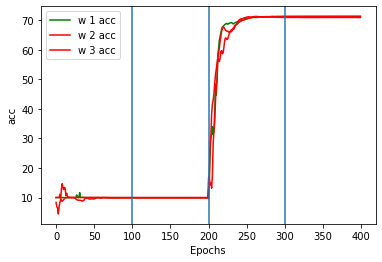

In [ ]:
path1='./InfoPro_fmnist_resnet16_K_2_/s1c1s2c2/worker_3/alpha_5.0_beta_1_1.0_beta_2_1.0_gamma_1_10.0_gamma_2_10.0_epochs_[100, 100, 100, 100]_run14/accuracy_epoch_Chunk0_0.txt'
path2='./InfoPro_fmnist_resnet16_K_2_/s1c1s2c2/worker_3/alpha_5.0_beta_1_1.0_beta_2_1.0_gamma_1_10.0_gamma_2_10.0_epochs_[100, 100, 100, 100]_run14/accuracy_epoch_Chunk1_0.txt'
path3='./InfoPro_fmnist_resnet16_K_2_/s1c1s2c2/worker_3/alpha_5.0_beta_1_1.0_beta_2_1.0_gamma_1_10.0_gamma_2_10.0_epochs_[100, 100, 100, 100]_run14/accuracy_epoch_Chunk2_0.txt'
path4='./InfoPro_fmnist_resnet16_K_2_/s1c1s2c2/worker_3/alpha_5.0_beta_1_1.0_beta_2_1.0_gamma_1_10.0_gamma_2_10.0_epochs_[100, 100, 100, 100]_run14/accuracy_epoch_Chunk3_0.txt'
df1 = pd.read_csv(path1, sep="\t", header=None, names = ["acc"])
df2 = pd.read_csv(path2, sep="\t", header=None, names = ["acc"])
df3 = pd.read_csv(path3, sep="\t", header=None, names = ["acc"])
df4 = pd.read_csv(path4, sep="\t", header=None, names = ["acc"])

l3 = []
for element3 in df1.acc: #c1
  l3.append(element3)
for element3 in df3.acc: #c2
  l3.append(element3)
for element3 in df2.acc: #c1
  l3.append(element3)
for element3 in df4.acc: #c2
  l3.append(element3)

plt.plot(l3, label = "w 1 acc",c='g')

#########################################################
path1='./InfoPro_fmnist_resnet16_K_2_/s1c1s2c2/worker_3/alpha_5.0_beta_1_1.0_beta_2_1.0_gamma_1_10.0_gamma_2_10.0_epochs_[100, 100, 100, 100]_run14/accuracy_epoch_Chunk0_1.txt'
path2='./InfoPro_fmnist_resnet16_K_2_/s1c1s2c2/worker_3/alpha_5.0_beta_1_1.0_beta_2_1.0_gamma_1_10.0_gamma_2_10.0_epochs_[100, 100, 100, 100]_run14/accuracy_epoch_Chunk1_1.txt'
path3='./InfoPro_fmnist_resnet16_K_2_/s1c1s2c2/worker_3/alpha_5.0_beta_1_1.0_beta_2_1.0_gamma_1_10.0_gamma_2_10.0_epochs_[100, 100, 100, 100]_run14/accuracy_epoch_Chunk2_1.txt'
path4='./InfoPro_fmnist_resnet16_K_2_/s1c1s2c2/worker_3/alpha_5.0_beta_1_1.0_beta_2_1.0_gamma_1_10.0_gamma_2_10.0_epochs_[100, 100, 100, 100]_run14/accuracy_epoch_Chunk3_1.txt'
df1 = pd.read_csv(path1, sep="\t", header=None, names = ["acc"])
df2 = pd.read_csv(path2, sep="\t", header=None, names = ["acc"])
df3 = pd.read_csv(path3, sep="\t", header=None, names = ["acc"])
df4 = pd.read_csv(path4, sep="\t", header=None, names = ["acc"])

l3 = []
for element3 in df1.acc:
  l3.append(element3)
for element3 in df3.acc:
  l3.append(element3)
for element3 in df2.acc:
  l3.append(element3)
for element3 in df4.acc:
  l3.append(element3)

plt.plot(l3, label = "w 2 acc",c='r')

#########################################################
path1='./InfoPro_fmnist_resnet16_K_2_/s1c1s2c2/worker_3/alpha_5.0_beta_1_1.0_beta_2_1.0_gamma_1_10.0_gamma_2_10.0_epochs_[100, 100, 100, 100]_run14/accuracy_epoch_Chunk0_2.txt'
path2='./InfoPro_fmnist_resnet16_K_2_/s1c1s2c2/worker_3/alpha_5.0_beta_1_1.0_beta_2_1.0_gamma_1_10.0_gamma_2_10.0_epochs_[100, 100, 100, 100]_run14/accuracy_epoch_Chunk1_2.txt'
path3='./InfoPro_fmnist_resnet16_K_2_/s1c1s2c2/worker_3/alpha_5.0_beta_1_1.0_beta_2_1.0_gamma_1_10.0_gamma_2_10.0_epochs_[100, 100, 100, 100]_run14/accuracy_epoch_Chunk2_2.txt'
path4='./InfoPro_fmnist_resnet16_K_2_/s1c1s2c2/worker_3/alpha_5.0_beta_1_1.0_beta_2_1.0_gamma_1_10.0_gamma_2_10.0_epochs_[100, 100, 100, 100]_run14/accuracy_epoch_Chunk3_2.txt'
df1 = pd.read_csv(path1, sep="\t", header=None, names = ["acc"])
df2 = pd.read_csv(path2, sep="\t", header=None, names = ["acc"])
df3 = pd.read_csv(path3, sep="\t", header=None, names = ["acc"])
df4 = pd.read_csv(path4, sep="\t", header=None, names = ["acc"])

l3 = []
for element3 in df1.acc:
  l3.append(element3)
for element3 in df3.acc:
  l3.append(element3)
for element3 in df2.acc:
  l3.append(element3)
for element3 in df4.acc:
  l3.append(element3)

plt.plot(l3, label = "w 3 acc",c='r')

plt.axvline(100)
plt.axvline(200)
plt.axvline(300)
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("acc")

###s1s2c1c2

Text(0, 0.5, 'acc')

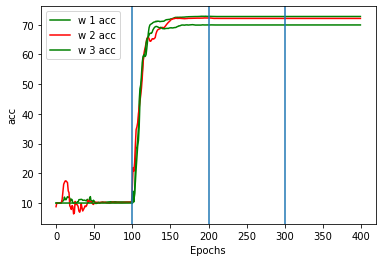

In [ ]:
path1='./InfoPro_fmnist_resnet16_K_2_/s1s2c1c2/worker_3/alpha_5.0_beta_1_1.0_beta_2_1.0_gamma_1_10.0_gamma_2_10.0_epochs_[100, 100, 100, 100]_run13/accuracy_epoch_Chunk0_0.txt'
path2='./InfoPro_fmnist_resnet16_K_2_/s1s2c1c2/worker_3/alpha_5.0_beta_1_1.0_beta_2_1.0_gamma_1_10.0_gamma_2_10.0_epochs_[100, 100, 100, 100]_run13/accuracy_epoch_Chunk1_0.txt'
path3='./InfoPro_fmnist_resnet16_K_2_/s1s2c1c2/worker_3/alpha_5.0_beta_1_1.0_beta_2_1.0_gamma_1_10.0_gamma_2_10.0_epochs_[100, 100, 100, 100]_run13/accuracy_epoch_Chunk2_0.txt'
path4='./InfoPro_fmnist_resnet16_K_2_/s1s2c1c2/worker_3/alpha_5.0_beta_1_1.0_beta_2_1.0_gamma_1_10.0_gamma_2_10.0_epochs_[100, 100, 100, 100]_run13/accuracy_epoch_Chunk3_0.txt'
df1 = pd.read_csv(path1, sep="\t", header=None, names = ["acc"])
df2 = pd.read_csv(path2, sep="\t", header=None, names = ["acc"])
df3 = pd.read_csv(path3, sep="\t", header=None, names = ["acc"])
df4 = pd.read_csv(path4, sep="\t", header=None, names = ["acc"])

l3 = []
for element3 in df1.acc: #c1
  l3.append(element3)
for element3 in df2.acc: #c2
  l3.append(element3)
for element3 in df3.acc: #c1
  l3.append(element3)
for element3 in df4.acc: #c2
  l3.append(element3)

plt.plot(l3, label = "w 1 acc",c='g')

#########################################################
path1='./InfoPro_fmnist_resnet16_K_2_/s1s2c1c2/worker_3/alpha_5.0_beta_1_1.0_beta_2_1.0_gamma_1_10.0_gamma_2_10.0_epochs_[100, 100, 100, 100]_run13/accuracy_epoch_Chunk0_1.txt'
path2='./InfoPro_fmnist_resnet16_K_2_/s1s2c1c2/worker_3/alpha_5.0_beta_1_1.0_beta_2_1.0_gamma_1_10.0_gamma_2_10.0_epochs_[100, 100, 100, 100]_run13/accuracy_epoch_Chunk1_1.txt'
path3='./InfoPro_fmnist_resnet16_K_2_/s1s2c1c2/worker_3/alpha_5.0_beta_1_1.0_beta_2_1.0_gamma_1_10.0_gamma_2_10.0_epochs_[100, 100, 100, 100]_run13/accuracy_epoch_Chunk2_1.txt'
path4='./InfoPro_fmnist_resnet16_K_2_/s1s2c1c2/worker_3/alpha_5.0_beta_1_1.0_beta_2_1.0_gamma_1_10.0_gamma_2_10.0_epochs_[100, 100, 100, 100]_run13/accuracy_epoch_Chunk3_1.txt'
df1 = pd.read_csv(path1, sep="\t", header=None, names = ["acc"])
df2 = pd.read_csv(path2, sep="\t", header=None, names = ["acc"])
df3 = pd.read_csv(path3, sep="\t", header=None, names = ["acc"])
df4 = pd.read_csv(path4, sep="\t", header=None, names = ["acc"])

l3 = []
for element3 in df1.acc:
  l3.append(element3)
for element3 in df2.acc:
  l3.append(element3)
for element3 in df3.acc:
  l3.append(element3)
for element3 in df4.acc:
  l3.append(element3)

plt.plot(l3, label = "w 2 acc",c='r')

#**********************************************************

path1='./InfoPro_fmnist_resnet16_K_2_/s1s2c1c2/worker_3/alpha_5.0_beta_1_1.0_beta_2_1.0_gamma_1_10.0_gamma_2_10.0_epochs_[100, 100, 100, 100]_run13/accuracy_epoch_Chunk0_2.txt'
path2='./InfoPro_fmnist_resnet16_K_2_/s1s2c1c2/worker_3/alpha_5.0_beta_1_1.0_beta_2_1.0_gamma_1_10.0_gamma_2_10.0_epochs_[100, 100, 100, 100]_run13/accuracy_epoch_Chunk1_2.txt'
path3='./InfoPro_fmnist_resnet16_K_2_/s1s2c1c2/worker_3/alpha_5.0_beta_1_1.0_beta_2_1.0_gamma_1_10.0_gamma_2_10.0_epochs_[100, 100, 100, 100]_run13/accuracy_epoch_Chunk2_2.txt'
path4='./InfoPro_fmnist_resnet16_K_2_/s1s2c1c2/worker_3/alpha_5.0_beta_1_1.0_beta_2_1.0_gamma_1_10.0_gamma_2_10.0_epochs_[100, 100, 100, 100]_run13/accuracy_epoch_Chunk3_2.txt'
df1 = pd.read_csv(path1, sep="\t", header=None, names = ["acc"])
df2 = pd.read_csv(path2, sep="\t", header=None, names = ["acc"])
df3 = pd.read_csv(path3, sep="\t", header=None, names = ["acc"])
df4 = pd.read_csv(path4, sep="\t", header=None, names = ["acc"])

l3 = []
for element3 in df1.acc: #c1
  l3.append(element3)
for element3 in df2.acc: #c2
  l3.append(element3)
for element3 in df3.acc: #c1
  l3.append(element3)
for element3 in df4.acc: #c2
  l3.append(element3)

plt.plot(l3, label = "w 3 acc",c='g')

plt.axvline(100)
plt.axvline(200)
plt.axvline(300)
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("acc")